In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data['current_year'] = 2020
data['no_years'] = data['current_year'] - data['year']
data.drop(['year','current_year','name'], axis=1, inplace=True)

In [7]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [8]:
data.shape

(4340, 7)

## EDA

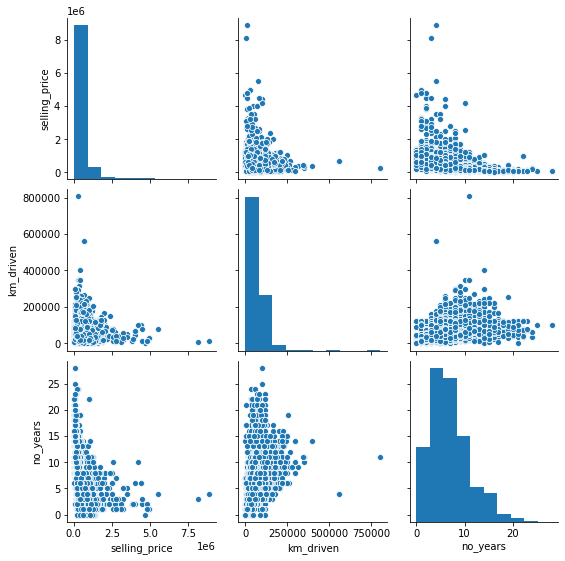

In [9]:
sns.pairplot(data)

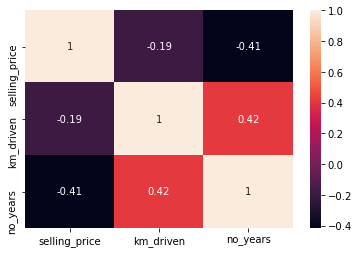

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
scaler = StandardScaler()
scaler.fit(data.iloc[:,:1])
selling_price = scaler.transform(data.iloc[:,:1])
selling_price = selling_price.reshape(4340,)

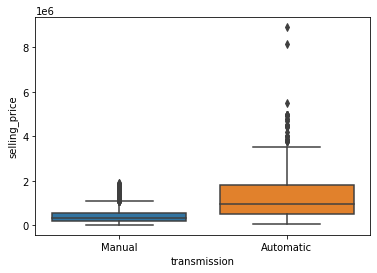

In [24]:
sns.boxplot(data.transmission,data.selling_price)

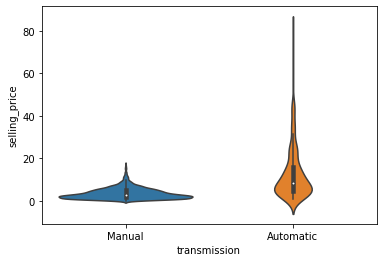

In [37]:
sns.violinplot(data.transmission,data.selling_price*9e-6)

In [32]:
print('Mean')
print('  Manual:', np.mean(data[data.transmission == 'Manual'].selling_price))
print('  Automatic:', np.mean(data[data.transmission == 'Automatic'].selling_price))

Mean
  Manual: 400066.6857656732
  Automatic: 1408154.0


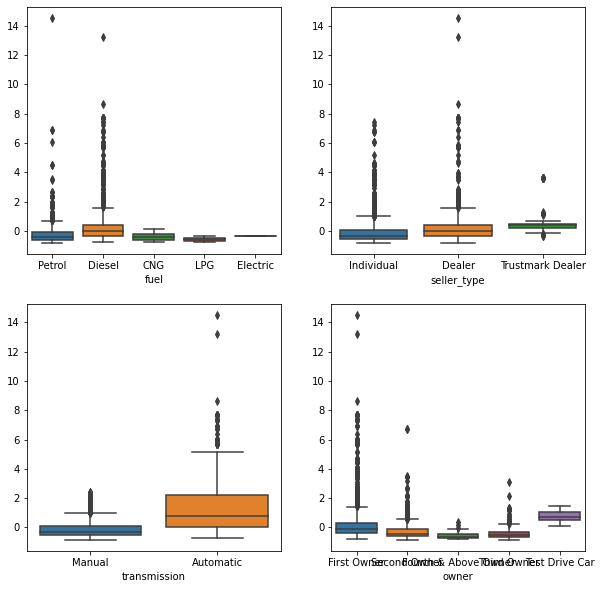

In [12]:
columns = pd.Index(['fuel','seller_type','transmission','owner'])
plt.figure(figsize=(10,10))
for i in columns:
        plt.subplot(2,2,columns.get_loc(i)+1)
        sns.boxplot(data[i],selling_price)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
final_data = pd.get_dummies(data, drop_first=True)

In [22]:
final_data.head(10)

,selling_price,km_driven,no_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0
5,140000,125000,13,0,0,0,1,1,0,1,0,0,0,0
6,550000,25000,4,0,0,0,1,1,0,1,0,0,0,0
7,240000,60000,6,0,0,0,1,1,0,1,0,1,0,0
8,850000,25000,5,0,0,0,1,1,0,1,0,0,0,0
9,365000,78000,3,0,0,0,0,1,0,1,0,0,0,0


In [15]:
X = final_data.iloc[:,1:]
y = final_data.iloc[:,0]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3038, 13), (1302, 13), (3038,), (1302,))

### DecisionTreeRegressor

In [17]:
tree_reg = DecisionTreeRegressor(criterion='mae')

parameters = {'splitter' : ["best", "random"], 'max_depth' : [6,7,8,9,10], 'random_state' : [1,2,3,4,5,6,7,8,9],
              'min_samples_split' : [6,7,8,9,10], 'min_samples_leaf' : [1,2,3]}

In [18]:
tree_g_reg = GridSearchCV(tree_reg, param_grid=parameters, n_jobs=-1)

tree_g_reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [6, 7, 8, 9, 10],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [19]:
print(tree_g_reg.best_estimator_)
print(tree_g_reg.best_score_)

DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_leaf=3,
                      min_samples_split=6, random_state=2, splitter='random')
0.6130729785058703


### SVR

In [31]:
svm_reg = SVR(kernel='linear')

parameters = {'kernel':['linear', 'poly', 'rbf']}

In [33]:
svm_g_reg = GridSearchCV(svm_reg, param_grid=parameters, n_jobs=-1)

svm_g_reg.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [34]:
print(svm_g_reg.best_estimator_)
print(svm_g_reg.best_score_)

SVR(kernel='linear')
-0.01479208066766935


### SVC

In [38]:
# svm_clf = SVC(kernel='linear')

# clf = GridSearchCV(svm_clf, param_grid=parameters, n_jobs=-1)

# clf.fit(X_train,y_train)

# print(clf.best_estimator_)
# print(clf.best_score_)

## RandomForestRegressor

In [43]:
ran_reg = RandomForestRegressor()

parameters = {'criterion' : ["mse", "mae"]}

In [44]:
ran_g_reg = GridSearchCV(ran_reg, param_grid=parameters, n_jobs=-1)

ran_g_reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae']})

In [45]:
print(ran_g_reg.best_estimator_)
print(ran_g_reg.best_score_)

RandomForestRegressor(criterion='mae')
0.6468991800206212
